In [34]:
# Leer la basde de datos e importar librerías
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import KNNImputer 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

bd = pd.read_csv(r'C:\Users\maris\Documents\github\LinearRegression\housing.csv', sep=',')

In [35]:
print(bd.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [36]:
print(bd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [37]:
print(bd.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [38]:
# Contar los valores nulos en la columna total_bedrooms
bd["total_bedrooms"].isna().sum()


207

<Axes: xlabel='total_bedrooms', ylabel='Count'>

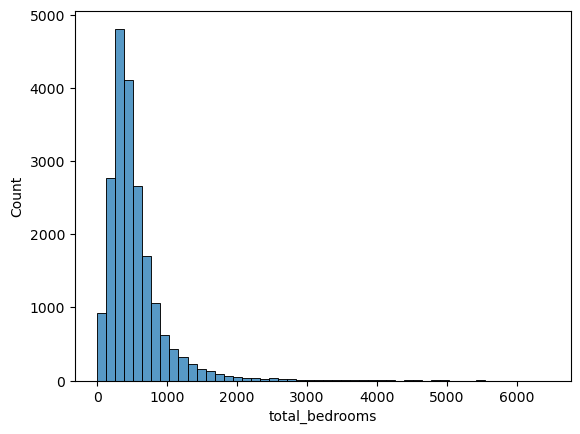

In [39]:
sns.histplot(data=bd, x='total_bedrooms', bins=50)

<Axes: xlabel='total_bedrooms'>

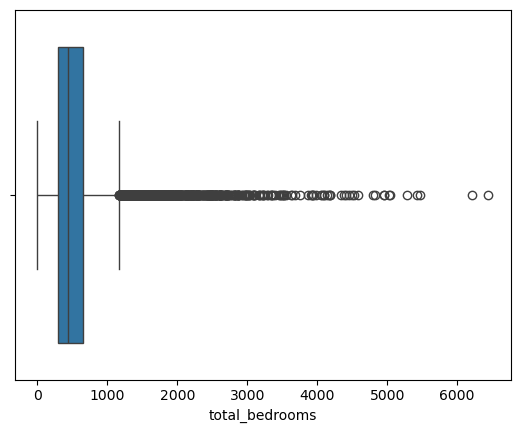

In [41]:
sns.boxplot(data=bd, x='total_bedrooms')

In [42]:
# correlación entre variables numéricas
print(bd.select_dtypes(include='number').corr())

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

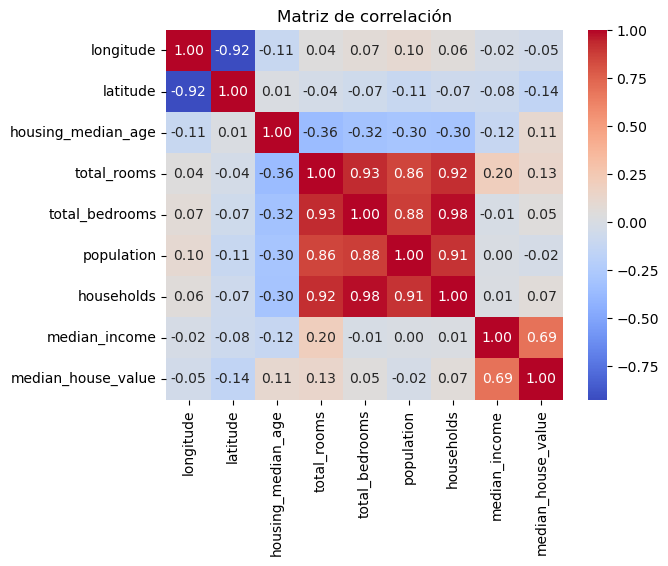

In [43]:
sns.heatmap(bd.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

In [44]:
# Crear el imputador con k=5 vecinos
imputer = KNNImputer(n_neighbors=5)

# Ajustar y transformar usando las columnas correlacionadas
imputed = imputer.fit_transform(bd[["total_bedrooms", "total_rooms","population", "households"]])

# Reemplazar SOLO la columna total_bedrooms (columna 0 del array resultante)
bd["total_bedrooms"] = imputed[:, 0]

In [45]:
# Verificar que ya no queden valores nulos
print("Nulos en total_bedrooms:", bd["total_bedrooms"].isna().sum())

Nulos en total_bedrooms: 0


In [46]:
print(bd.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.841269   1425.476744    499.539680       3.870671   
std        420.954820   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        295.75000

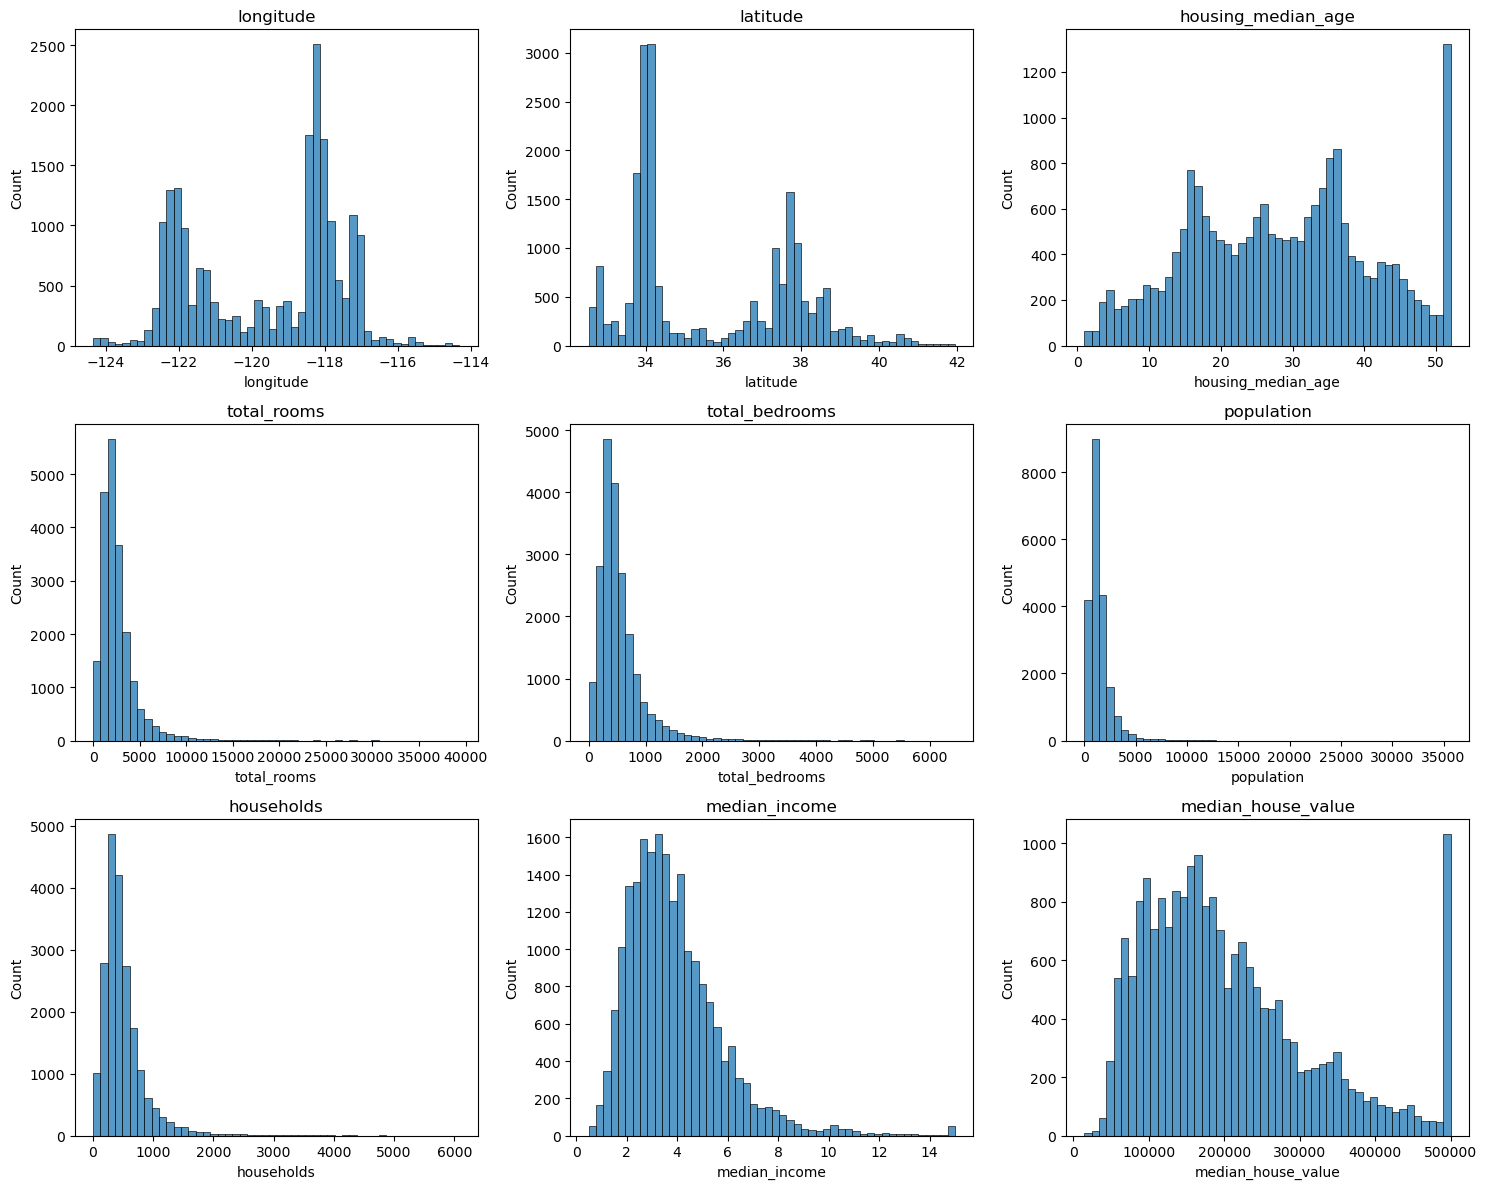

In [47]:
# Visualizar distribuciones de todas las variables numéricas
num_cols = bd.select_dtypes(include='number').columns
n = len(num_cols)
fig, axes = plt.subplots(nrows=(n // 3) + (n % 3 > 0), ncols=3, figsize=(15, 4 * ((n // 3) + (n % 3 > 0))))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(bd[col], bins=50, ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

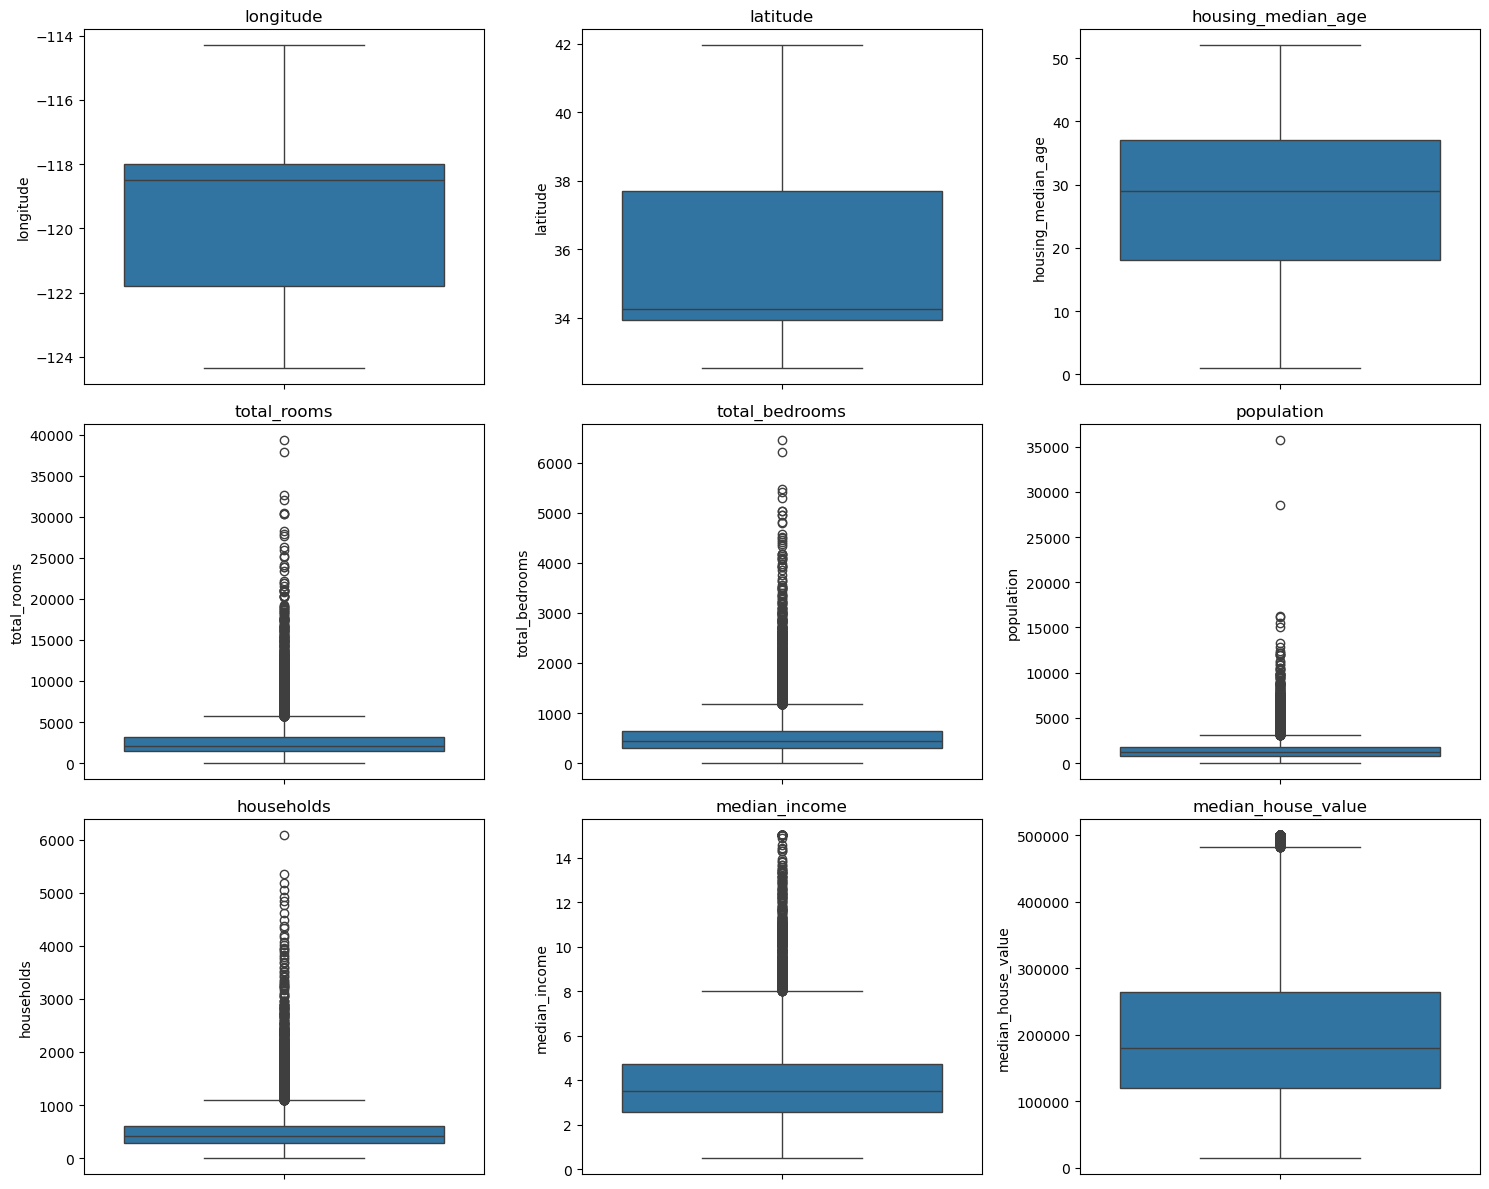

In [48]:
# Visualizar distribuciones de todas las variables numéricas
num_cols = bd.select_dtypes(include='number').columns
n = len(num_cols)
fig, axes = plt.subplots(nrows=(n // 3) + (n % 3 > 0), ncols=3, figsize=(15, 4 * ((n // 3) + (n % 3 > 0))))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(y=bd[col], ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

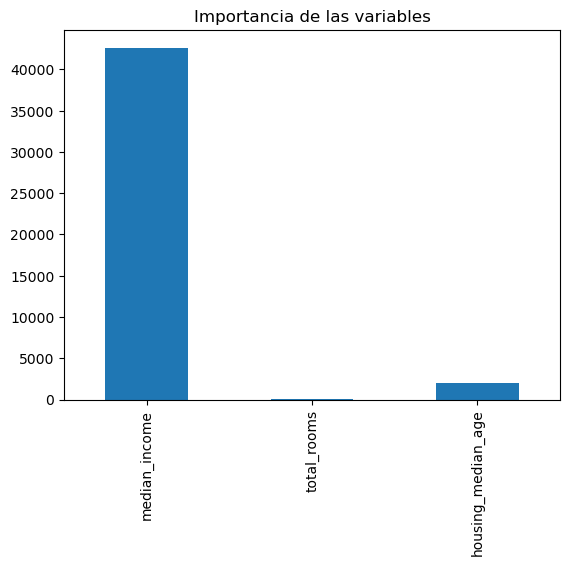

In [ ]:
# Visualizar relaciones entre variables numéricas y la variable objetivo
target = 'median_house_value'  # Cambia esto si tu variable objetivo es diferente
exclude = ['latitude', 'longitude', target]
num_cols = [col for col in bd.select_dtypes(include='number').columns if col not in exclude]
n = len(num_cols)
fig, axes = plt.subplots(nrows=(n // 3) + (n % 3 > 0), ncols=3, figsize=(15, 4 * ((n // 3) + (n % 3 > 0))))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    axes[i].scatter(bd[col], bd[target], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'{target} vs {col}')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

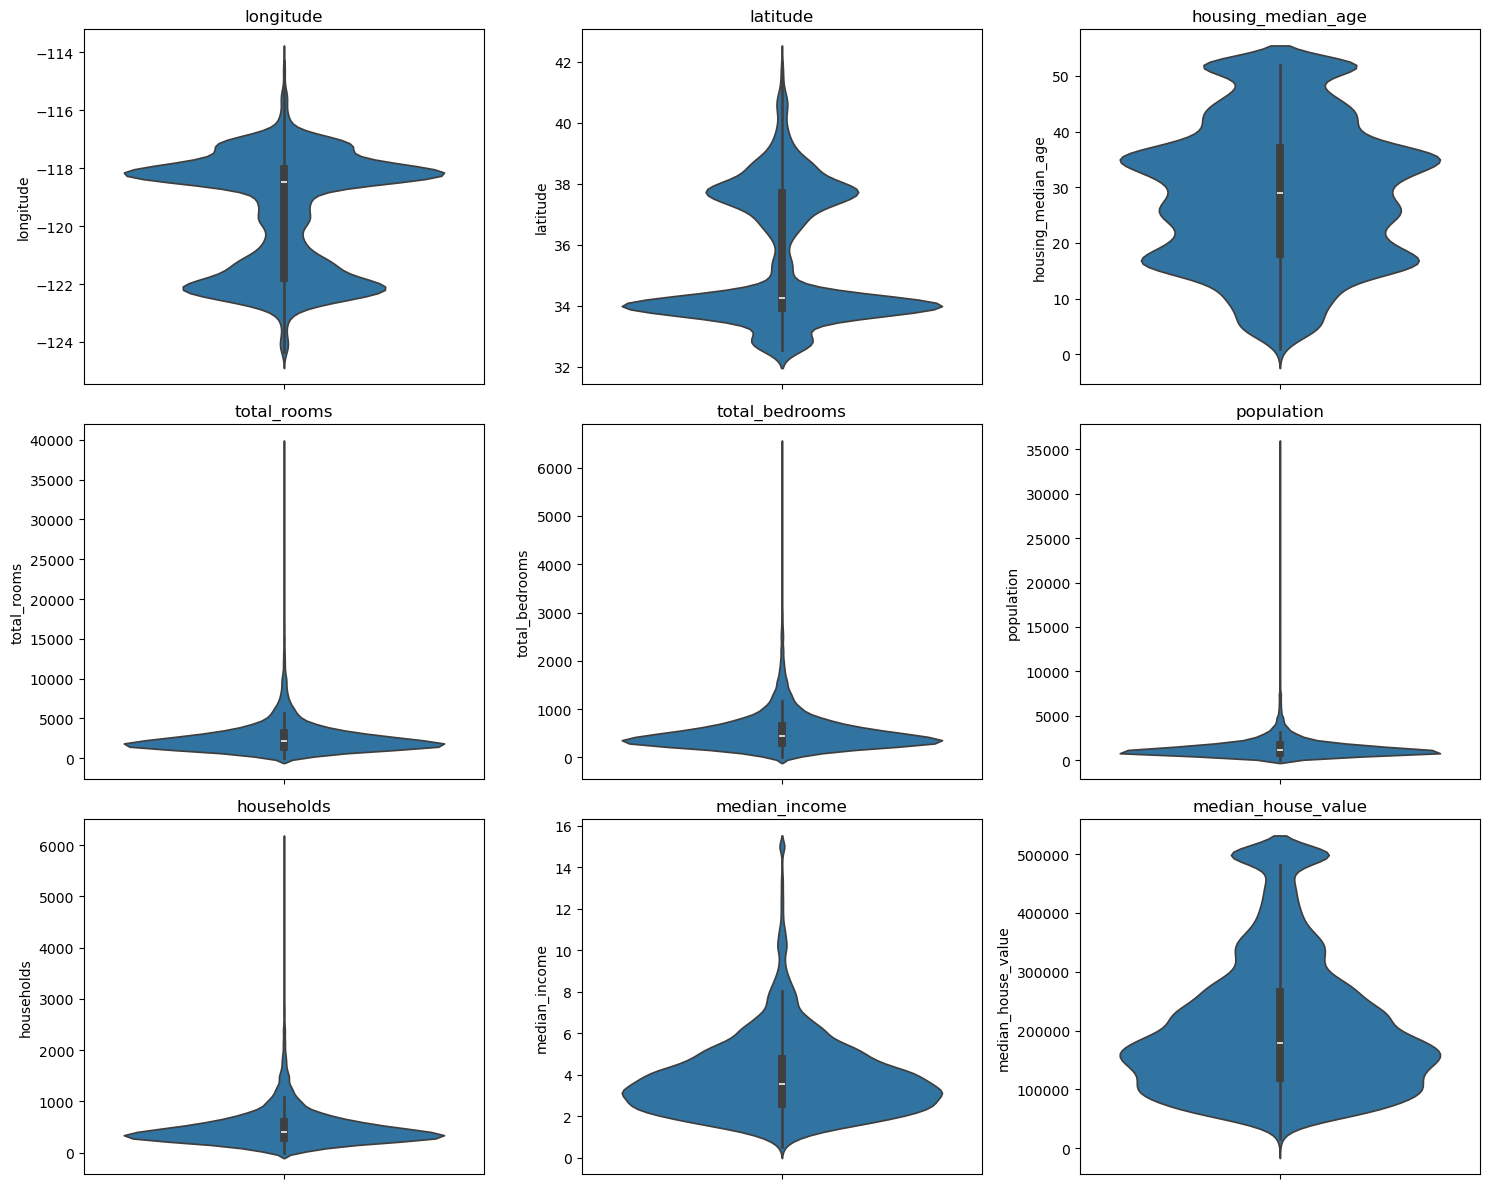

In [51]:
# Visualizar distribuciones de todas las variables numéricas
num_cols = bd.select_dtypes(include='number').columns
n = len(num_cols)
fig, axes = plt.subplots(nrows=(n // 3) + (n % 3 > 0), ncols=3, figsize=(15, 4 * ((n // 3) + (n % 3 > 0))))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.violinplot(y=bd[col], ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [54]:
# Transformar variables numéricas con logaritmo natural
exclude = ['median_house_value', 'latitude', 'longitude']
num_cols = [col for col in bd.select_dtypes(include='number').columns if col not in exclude]
for col in num_cols:
    bd[col + '_log'] = np.log1p(bd[col])
print('Variables transformadas con logaritmo:', [col + '_log' for col in num_cols])

Variables transformadas con logaritmo: ['housing_median_age_log', 'total_rooms_log', 'total_bedrooms_log', 'population_log', 'households_log', 'median_income_log']


In [56]:
# Crear variables dummies para la variable categórica ocean_proximity
bd = pd.get_dummies(bd, columns=['ocean_proximity'], drop_first=True)
print('Variables dummies creadas para ocean_proximity:', [col for col in bd.columns if 'oceanproximity_' in col])

Variables dummies creadas para ocean_proximity: []


In [28]:
# Guarda el modelo entrenado en un archivo
import joblib
joblib.dump(model, 'modelo_regresion_lineal.pkl')

['modelo_regresion_lineal.pkl']

In [57]:
# Dividir en variables predictoras y variable objetivo
X = bd.drop([
    "median_house_value",
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
], axis=1)

y = bd["median_house_value"]


In [58]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [59]:
# Muestra los coeficientes del modelo
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)

Coeficientes: [4.26533268e+04 3.85104556e+00 1.97574393e+03]
Intercepto: -25029.511934195034


In [62]:
# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

y_pred = modelo.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R²: 0.6094849835598748
RMSE: 71535.61236761957


c:\Users\maris\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [63]:
print("Precios predichos para las primeras 5 manzanas del test:")
print(y_pred[:5])

Precios predichos para las primeras 5 manzanas del test:
[ 27185.73284067 108286.7319016  310978.94621937 279325.49319392
 259874.19719336]


In [64]:
# Mostrar los primeros precios predichos y los reales para el conjunto de prueba
print("Precios predichos para las primeras 5 manzanas del test:")
print(y_pred[:5])
print("Precios reales para las primeras 5 manzanas del test:")
print(y_test[:5].values)

Precios predichos para las primeras 5 manzanas del test:
[ 27185.73284067 108286.7319016  310978.94621937 279325.49319392
 259874.19719336]
Precios reales para las primeras 5 manzanas del test:
[ 47700.  45800. 500001. 218600. 278000.]
